***
**Algorithmes d'optimisation -- L3 MINT et doubles licences 2019/2020 -- Université Paris-Sud**
***
$\newcommand{\Rsp}{\mathbb{R}}
\newcommand{\nr}[1]{\|#1\|}
\newcommand{\abs}[1]{|#1|}
\newcommand{\eps}{\varepsilon}
\newcommand{\sca}[2]{\langle#1|#2\rangle}
\newcommand{\D}{\mathrm{D}}
\newcommand{\hdots}{\dots}
\newcommand{\cond}{\mathrm{cond}}$


# TP6 : Machines à vecteur support

L'objectif de ce (court) TP est de résoudre un problème d'optimisation apparaissant en classification supervisée: le problème d'entraînement d'une machine à vecteur support ("support vector machine"). Comme dans le TP sur la régression logistique, on a à notre disposition une famille de points $(x_\alpha)_{\alpha \in \{1,\hdots,k\}}$ de $\Rsp^d$ répartis en deux classes $\{1,\hdots,k\} = A \sqcup B$. On considère l'ensemble suivant  

$$ K = \{ w \in \Rsp^d\mid \forall a \in A, \sca{w}{x_a}\geq 1 \hbox{ et } \forall b\in B, \sca{w}{x_b} \leq -1 \}. $$

Ainsi $K$ contient l'ensemble des vecteurs $w$ permettant de "séparer linéairement" les points $(x_a)_{a\in A}$ des points $(x_b)_{b\in B}$. En particulier les points $(x_a)_{a\in A}$ et $(x_b)_{b\in B}$ sont de part et d'autre des hyperplans $\{x\mid \sca{w}{x} = 0\}$. Noter qu'il est tout à fait possible que l'ensemble $K$ soit vide! On cherche à résoudre le problème de minimisation
$$ (P) = \min_{w \in K} \nr{w}^2 $$

Dans la suite, on pose 

$$ z_\alpha = \begin{cases} 
-x_\alpha &\hbox{ si } \alpha\in A\\
x_\alpha &\hbox{ si } \alpha\in B
\end{cases} $$

et $Z$ la matrice ayant $k$ lignes et $d$ colonnes, dont les $k$ lignes sont les vecteurs $z_1,\hdots,z_k$. Enfin, on note $e = (1,\hdots,1)\in \Rsp^k$.

**Q1)** Montrer que $K = \{ w \in \Rsp^d \mid Z w + e \leq 0 \},$
où l'inégalité $Z w+ e\leq 0$ signifie que $\forall i, (Z w+ e)_i \leq 0$.

Grâce à la question précédente, le lagrangien de ce problème est donné par

$$ 
L: (w,\lambda)\in\Rsp^d\times \Rsp^k_+ \mapsto \nr{w}^2 + \sca{\lambda }{ Z w + e} 
$$

et le problème dual vaut par définition

$$ (D) := \sup_{\lambda \in \Rsp_+^k} \inf_{x\in \Rsp^d} L(x,\lambda) $$

**Q2)** 
Monter que le problème dual peut être mis sous la forme

$$ \max_{\lambda \in\Rsp_+^k} G(\lambda) \hbox{ où } G(\lambda) = -\frac14 \nr{Z^T\lambda}^2+ \sca{\lambda}{e} 
$$

*(Indication: calculer le minimum de $L(\cdot,\lambda)$ pour $\lambda$ fixé et vérifier qu'il est atteint pour $w_{\lambda}=-\frac12 Z^T \lambda$.)*


## 1. Algorithme d'Uzawa

L'algorithme du gradient projeté pour le problème dual (D) est donné par 

$$ \begin{cases}
\lambda^{(0)} = 0 \in \Rsp^k \\
w^{(n)} = - \frac12 Z^T \lambda^{(n)} &(\in \arg\min_{x\in\Rsp^d} \ell(x,\lambda)) \\
\gamma^{(n)} = \nabla G(\lambda^{(n)}) &(Z w^{(n)} + e, \hbox{ cf Q3}) \\
\lambda^{(n+1)} = p_{\Rsp_+^k}(\lambda^{(n)} + \tau \gamma^{(n)})\\
\end{cases}
$$

où l'on rappelle que $p_{\Rsp_+^k}(v) = (\max(v_1,0),\hdots,\max(v_k,0))$. L'algorithme est arrêté lorsque $\nr{w^{(n)} - w^{(n+1)}}\leq `err`$.

**Q3)**
Montrer que $\nabla G(\lambda) = e -\frac12 ZZ^T\lambda = Z w_\lambda + e$,


**Q4)[Convergence de l'algorithme d'Uzawa]** On pose  $S_\tau(\lambda) := p_{\Rsp_+^k}(\lambda + \tau \nabla G(\lambda))$, de sorte que $\lambda^{(n+1)} = S_\tau(\lambda^{(n)})$. 
- Montrer que la fonction $G$ est concave.
- En déduire que si $\lambda^*$ est un point fixe de $S_\tau$, alors $\lambda^*$ est solution du problème (D) (i.e. maximise $G$ sur $\Rsp_+^k$).


**Q5)** Écrire l'algorithme en utilisant la matrice $Z$ donné ci-dessous; on l'arrêtera au bout de 2000 itérations, puis:
- Tester l'algorithme sur les données ci dessous.
- À l'aide de la fonction lignes_niveau(w), tracez les lignes de niveau de la fonction $x\mapsto \sca{w}{x}$. Tracez la norme de $\lambda^{(n)}$.
- Vérifier numériquement les conditions KKT. 




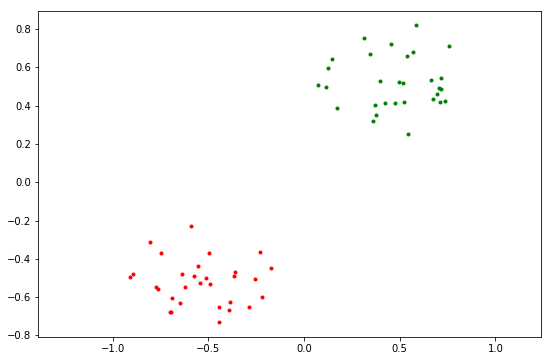

In [1]:
#\sum_{1\leq i\leq k} \lambda_i c_i

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# la commande suivante agrandit les figures
plt.rcParams['figure.figsize'] = [9.,6.]

#création des données jeu 1

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# la commande suivante agrandit les figures
plt.rcParams['figure.figsize'] = [9.,6.]

n = 30
X = np.vstack((np.hstack((-0.5+.2*np.random.randn(n,1), -0.5 + .15*np.random.randn(n,1))),
               np.hstack((0.5+.2*np.random.randn(n,1), 0.5 + .15*np.random.randn(n,1)))))
A = range(0,n)
B = range(n,2*n)
plt.plot(X[A,0],X[A,1],'.r')
plt.plot(X[B,0],X[B,1],'.g')
plt.axis('equal');

Z = X.copy()
Z[B,:] = -Z[B,:]


In [2]:
# <completer>

def lignes_niveau(w):
    u = lambda x,y: x*w[0] + y*w[1]
    Xcontour,Ycontour = np.meshgrid(np.linspace(-1., 1., 100),
                                    np.linspace(-1., 1., 100))
    Zcontour = u(Xcontour,Ycontour)
    p = plt.contour(Xcontour, Ycontour, Zcontour, cmap='RdBu')
    plt.clabel(p, inline=1, fontsize=10)
    plt.axis('equal')
    
plt.plot(X[A,0],X[A,1],'.r')
plt.plot(X[B,0],X[B,1],'.g')
lignes_niveau(w)
plt.axis('equal');

**Q6** Montrer que si $K = \emptyset$, alors $(P) = \infty$. Constater numériquement que (D) semble aussi être $+\infty$. 

In [3]:
#création des données jeu 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# la commande suivante agrandit les figures
plt.rcParams['figure.figsize'] = [9.,6.]

n = 30
X = np.vstack((np.hstack((-0.2+.2*np.random.randn(n,1), -0.2 + .15*np.random.randn(n,1))),
               np.hstack((0.2+.2*np.random.randn(n,1), 0.2 + .15*np.random.randn(n,1)))))
I = range(0,n)
J = range(n,2*n)
plt.plot(X[I,0],X[I,1],'.r')
plt.plot(X[J,0],X[J,1],'.g')
plt.axis('equal');

Z = X.copy()
Z[J,:] = -Z[J,:]

# <completer>



## 2. Algorithme de descente par coordonnée

On s'intéresse à un second algorithme pour trouver le maximum du problème

$$ (D) = \max_{\lambda \in\Rsp_+^k} G(\lambda) \hbox{ où } G(\lambda) = -\frac14 \nr{Z^T\lambda}^2+ \sca{\lambda}{e} 
$$

L'algorithme est un algorithme de montée de coordonnée à pas optimal. Dans la suite, on suppose que $ZZ^T$ est définie positive, de sorte que $G$ est strictement concave.


**Q1.** Soit $\lambda \in \Rsp_+^k$ et $i\in\{1,\hdots,k\}$. On pose $\lambda_t = \lambda + (t-\lambda_i) e_i$ et $g(t) = G(\lambda_t)$. 
- Montrer que la fonction $g$ est un polynôme de degré $2$, et que le coefficient du degré maximum est strictement négatif.
- Montrer que, si $Z_i$ désigne la $i$ème ligne de $Z$,
$$ g'(t) = \frac{\partial G}{\partial e_i}(\lambda_t) = - \frac{1}{2} \sca{Z_i}{Z^T (\lambda + (t-\lambda_i) e_i)} +  1$$
- En déduire que le maximiseur de $g$ sur $\Rsp_+$ est donné par 
$$ t_i(\lambda) := \max\left(\lambda_i - \frac{-\frac{1}{2}\sca{Z_i}{Z^T \lambda} +  1}{-\frac{1}{2}\nr{Z_i}^2}, 0\right)$$

On note maintenant $P_i: \Rsp_+^k \to \Rsp_+^k$, défini par $P_i(\lambda) = (\lambda_1,\hdots, \lambda_{i-1},t_i(\lambda),\lambda_{i+1},\hdots,\lambda_M)$, où la quantité $t_i(\lambda)$ est définie ci-dessus. On peut alors définir l'algorithme 
$$ \begin{cases}
\lambda^{(0)} = 0 \in \Rsp^k \\
w^{(n)} = - \frac12 Z^T \lambda^{(n)} &(\in \arg\min_{x\in\Rsp^d} L(x,\lambda)) \\
\lambda^{(n+1)} = P_n\circ \hdots \circ P_1(\lambda^{(n)}),
\end{cases}
$$
que l'on arrêtera dès que $\nr{w^{(n+1)} - w^{(n)}} \leq$ `err`.

**Q2.** Mettre en oeuvre cet algorithme et comparer sa vitesse de convergence à celle de l'algorithme d'Uzawa.

In [5]:
n = 30
X = np.vstack((np.hstack((-0.5+.2*np.random.randn(n,1), -0.5 + .15*np.random.randn(n,1))),
               np.hstack((0.5+.2*np.random.randn(n,1), 0.5 + .15*np.random.randn(n,1)))))
A = range(0,n)
B = range(n,2*n)
N = 2*n
Z = X.copy()
Z[B,:] = -Z[B,:]

# <completer>


**Q3.** Soit $S: \Rsp^k\to\Rsp^k_+$ l'opérateur défini par $S(\lambda) = P_k\circ\hdots\circ P_1(\lambda)$. 
- Démontrer que $G(S(\lambda)) \leq G(\lambda)$
- Démontrer que si $G(S(\lambda)) = G(\lambda)$, alors pour tout $i \in \{1,\hdots,k\}, P_i(\lambda) = \lambda$.
- En déduire que si $\lambda \in \Rsp^k_+$ est un point fixe de $S$, et si on pose
$$ \mu_i = -\frac{\partial G}{\partial \lambda_i}(\lambda), $$
alors, en utilisant **Q1**,
$$ \forall i\in\{1,\hdots,k\}, \begin{cases}
\mu_i \geq 0 \\
\lambda_i \mu_i  = 0 
\end{cases}
$$
En utilisant le théorème KKT, démontrer que $\lambda$ est alors un maximiseur du problème dual.